In [131]:
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Load CSV file into memory

In [132]:
# Data Sorce : https://github.com/fivethirtyeight/uber-tlc-foil-response
df = pd.read_csv("uber-raw-data-apr14.csv")

In [3]:
df.shape

(564516, 4)

In [5]:
df.head(5)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [6]:
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

# Augment data with additional columns

In [12]:
# Converting Date/Time string to pandas DateTime format

df['Date/Time'] = df['Date/Time'].map(pd.to_datetime)

In [23]:
# Day of the month

def get_dom(dt):
    return dt.day


df['dom'] = df['Date/Time'].map(get_dom)

In [28]:
df.head()

,Date/Time,Lat,Lon,Base,dom
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [36]:
# Week Day
def get_weekday(dt):
    return dt.weekday()

# Get Hour
def get_hour(dt):
    return dt.hour


df['weekday'] = df['Date/Time'].map(get_weekday)
df['hour'] = df['Date/Time'].map(get_hour)

# Analysis

Text(0.5, 1.0, 'Frequency by Date of Month - Uber - Apr 2014')

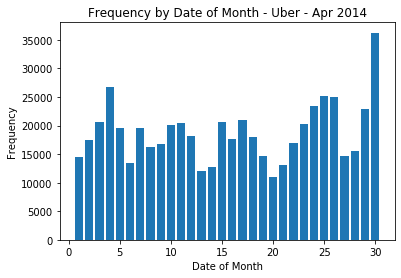

In [51]:
# Analyze the Date of Month

hist(df.dom, bins = 30, rwidth=.8, range=(0.5,30.5))
xlabel('Date of Month')
ylabel('Frequency')
title('Frequency by Date of Month - Uber - Apr 2014')

In [60]:
# for k,rows in df.groupby('dom'):
#    print(k, len(rows))

def count_rows(rows):
    return len(rows)

by_date = df.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

<BarContainer object of 30 artists>

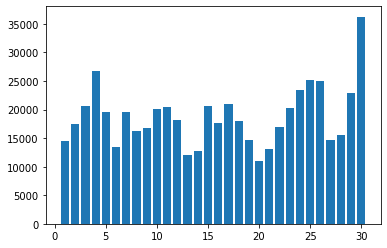

In [65]:
bar(range(1,31),by_date)

In [66]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

''

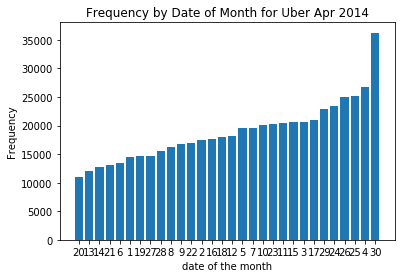

In [73]:
bar(range(1, 31), by_date_sorted)
xticks(range(1, 31), by_date_sorted.index)
xlabel('date of the month')
ylabel('Frequency')
title('Frequency by Date of Month for Uber Apr 2014')
;

In [74]:
# Analyze by Hour

''

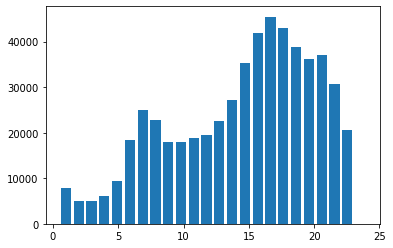

In [82]:
hist(df.hour, bins=24, rwidth=.8,range = (0.5, 24))
;

In [83]:
# Analyze by Weekday

''

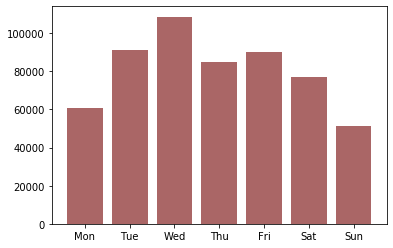

In [93]:
hist(df.weekday, bins=7, range=(-.5, 6.5), rwidth=.8, color='#AA6666')
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
;

# Cross Analysis (hour and Date of Week)

In [100]:
by_h_d = df.groupby('weekday hour'.split()).apply(count_rows).unstack()
by_h_d

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


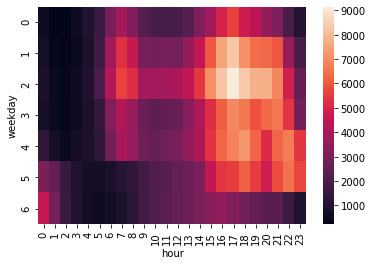

In [103]:
sns.heatmap(by_h_d)

# Latitude and Longitude based Analysis

''

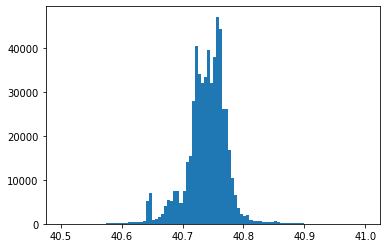

In [106]:
hist(df['Lat'], bins = 100, range=(40.5,41))
;

''

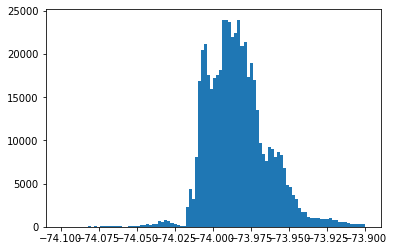

In [109]:
hist(df['Lon'], bins = 100,range=(-74.1,-73.9))
;

''

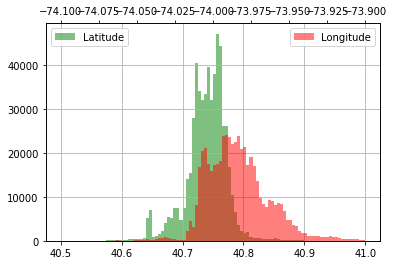

In [119]:
hist(df['Lat'], bins = 100, range=(40.5,41), color='g', alpha=.5, label='Latitude')
grid()
legend(loc="upper left")
twiny()
hist(df['Lon'], bins = 100,range=(-74.1,-73.9), color='r', alpha=.5, label='Longitude')
legend(loc="best")
;


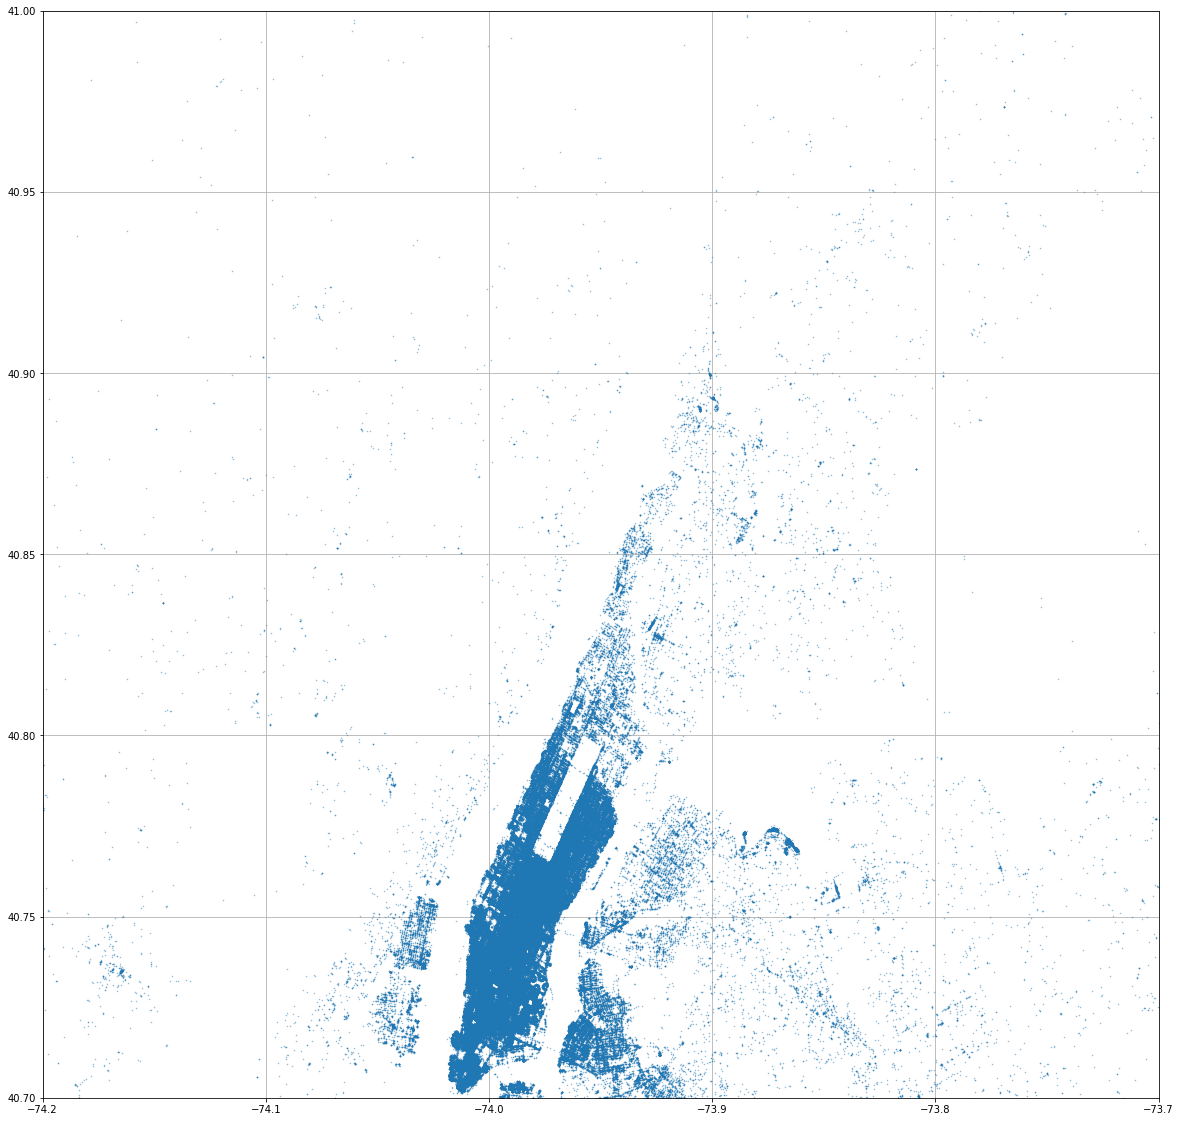

In [129]:
figure(figsize=(20, 20))
plot(df['Lon'], df['Lat'], '.', ms=1, alpha=.5)
xlim(-74.2, -73.7)
ylim(40.7, 41)
grid()

### This gives us a rough image of the city of Manhattan and the locations having maximum uber trips
<img src="manhattan_image.jpg">